In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sympy import symbols, solve

In [4]:
matrix = np.array([[2, -1, 3], [-2, 4, 5], [3, 2, -1]])


## Метод Данилевского

In [40]:
def danilevsky_method(A):
    n = len(A)
    B_ = np.eye(n)
    # Вычисляем матрицу Фронбениуса
    for k in range(1, n):
        B = np.eye(n)
        for j in range(n):
            if j == n - k - 1:
                B[-k - 1, j] = 1 / A[n - k, n - k - 1]
            else:
                B[-k - 1, j] = -A[n - k, j] / A[n - k, n - k - 1]
        A = np.linalg.inv(B) @ A @ B
        B_ @= B
    
    # Теперь у нас есть матрица Фронбениуса (Записана в A)
    # Осталось решить уравнение
    alpha = symbols("alpha")
    express = (
        sum([alpha ** (n - k) * el for k, el in enumerate(A[0], start=1)]) - alpha**n
    )
    # Найдем собственные значения
    values = [complex(i).real for i in solve(express)]
    # Найдем собственные векторы
    vectors = [B_ @ np.array([i**k for k in range(n - 1, -1, -1)]) for i in values]
    return values, vectors


values, vectors = danilevsky_method(matrix)
print(values)
print()
print(*vectors, sep="\n")


[-4.28412600340435, 3.762072500784623, 5.522053502619728]

[-0.59634993 -0.74753811  1.        ]
[ 2.3618035 -1.161669   1.       ]
[-0.12908993  3.45466165  1.        ]


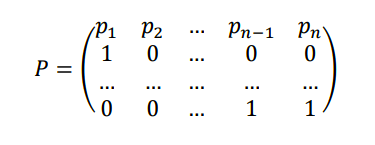

In [41]:
# Проверка первого значения и вектора
print(matrix @ vectors[0])
print(values[0] * vectors[0])

[ 2.55483824  3.20254744 -4.284126  ]
[ 2.55483824  3.20254744 -4.284126  ]


## Метод Крылова

In [138]:
def krylov_method(a):
    c = []
    n = len(a)

    c.append([1, *[0] * (n - 1)])  # начальный с [1, 0, 0, ..., 0]

    for i in range(n):
        c.append(np.dot(a, c[i]))  # рекурсивно вычисляем c

    C = np.array(c)

    cn = c.pop()  # выделяем столбец свободных членов cn

    c = np.array(c).transpose()

    for i in range(n):  # транспонируем матрицу коэффициентов C
        c[i] = list(reversed(c[i]))

    p = np.linalg.solve(c, cn)  # решаем систему C*p = cn

    x = symbols("x")  # вычисляем собственные значения
    values = solve(x**n - sum(p[i] * x ** (n - i - 1) for i in range(n)))
    values = [complex(i).real for i in values]

    # Вычисляем собственные векторы
    vectors = []

    for v in values:
        b = np.ones(n)
        
        for i in range(1, n):  # находим коэффиценты b
            b[i] = b[i - 1] * v - p[i - 1]
        x = np.sum([b[i] * C[n - i - 1] for i in range(n)], axis=0)
        vectors.append(x)
    return values, vectors


values, vectors = krylov_method(matrix)
print(values)
print()
print(*vectors, sep="\n")


[-4.28412600340435, 3.762072500784623, 5.522053502619728]

[ 17.20611362  21.56825201 -28.85237801]
[-11.133028    5.475855   -4.7137825]
[-0.07308562  1.95589299  0.56616051]


In [141]:
# Проверка первого значения и вектора
print(matrix @ vectors[0])
print(values[0] * vectors[0])


[-73.71315879 -92.40110927 123.60722289]
[-73.71315879 -92.40110927 123.60722289]


In [142]:
vectors[0] / vectors[0][-1]

array([-0.59634993, -0.74753811,  1.        ])